In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("boder_english_questions.csv") # see Boder_q_a in the data link below

Data: https://docs.google.com/spreadsheets/d/1yie_kXDaWOnuLV6UOi65qWAAgtWjvBbSilumxMKtRDU/edit#gid=0

### I. Data Cleaning

In [3]:
### change all the "?" inside of "[]" to "(q)"
# => change all the "?]" to "(q)]"
df.words = df.words.apply(lambda x: x.replace("?]", "(q)]"))

In [5]:
### get rid of ... and ......
# better for sentence tokenizers to work later
df.words = df.words.apply(lambda x: x.replace(". . .", ""))
df.words = df.words.apply(lambda x: x.replace(". . . .", ""))
df.words = df.words.apply(lambda x: x.replace(". . . . .", ""))
df.words = df.words.apply(lambda x: x.replace(". . . . . .", ""))

In [6]:
### divide words column with multi-sentences into a list
# using sentence tokenizer
from nltk import sent_tokenize

In [7]:
df.words = df.words.apply(lambda x: sent_tokenize(x))

In [8]:
### make new lists of id_new, sent_num, and words
# we decide whether this is a question in this process
# if there is no ? in the sentence, we do not record it
# we first make several lists
id_new_list=[]
sent_num_list=[]
words_list=[]

In [9]:
for i in range(len(df)):
    for j in list(df.words[i]): # j is a sentence
        if "?" in j:
            id_new_list.append(df.id_new[i])
            sent_num_list.append(df.sent_num[i])
            words_list.append(j)

In [10]:
data = pd.DataFrame()
data["id_new"]=id_new_list
data["sent_num"]=sent_num_list
data["words"]=words_list

### II. Data Wrangling and Further Cleaning

In [11]:
# add word count first
# exclude all the notes, i.e. inside []
data["word_count"]=data.words.apply(lambda x: x.count(" ")-x.count("[")+1)

In [12]:
# get rid of the zero count ones
data[data["word_count"]==0]

,id_new,sent_num,words,word_count
4013,36,70,[?,0
4057,36,259,[?,0
7513,61,536,[Unintelligible]?,0
7704,64,273,[?,0
7723,64,381,[What(q)]?,0
7729,64,407,[Apart(q)]?,0
7748,64,503,[Who(q)]?,0
10841,90,1205,[?,0
11564,95,616,[?,0
14407,118,121,[unintelligible]?,0


In [13]:
# as we don't care the notes, remove all of these
data = data[data["word_count"]!=0].reset_index()

### III. Basic Summary

#### 1. How many questions are there in Boder Interviews?

In [14]:
### How many questions are there in Boder Interviews?
len(data)

16055

#### 2. Are there repeated questions?

In [15]:
### Are there repeated questions?
data1 = pd.DataFrame()
data1["words"] = data.words
data1["dup_count"] = [1]*len(data) # duplicat count
grouped = data1.groupby("words", sort=False).sum().sort_values("dup_count", ascending=False)
# frequent question, more then 10 duplicates
grouped[grouped.dup_count>=10] 

,dup_count
words,
Yes?,842
Nu?,554
What?,151
Why?,132
Well?,116
Where?,78
And?,74
And then?,60
Who?,48


Check out Tableau for visualization of questions' frequencies.

#### 3. What are the lengths of questions?

In [16]:
import seaborn as sns

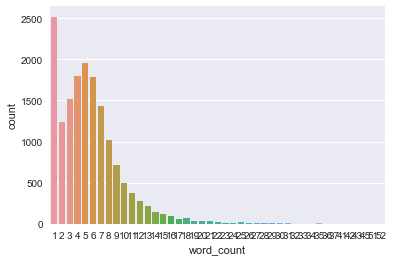

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="word_count", data=data)

In [18]:
data["word_count"].mean()

5.620803488009965

In [19]:
data["word_count"].median()

5.0

In [20]:
data["word_count"].max()

52

### IV. WH questions - What, When, How, Where, Why, and Whos
These type of question has some "priority". We need to minus this in later types.
This might not be that precise, as these words can also be conj.

In [55]:
data["What"] = data.words.apply(lambda x: x.count("what")+x.count("What"))
data["When"] = data.words.apply(lambda x: x.count("when")+x.count("When"))
data["How"] = data.words.apply(lambda x: x.count("how")+x.count("How"))
data["Where"] = data.words.apply(lambda x: x.count("where")+x.count("Where"))
data["Why"] = data.words.apply(lambda x: x.count("why")+x.count("Why"))
# for who related questions, we include who, whose, and whom and name them as whos
data["Whos"] = data.words.apply(lambda x: x.count("who")+x.count("Who")+x.count("whom")+x.count("Whom")+x.count("whose")+x.count("Whose"))

#### 1. Number of Multi-questions

In [56]:
# sum of number of WH questions
data["WH"] = data.What + data.When + data.How + data.Where + data.Whos

In [57]:
# WH >1 means there are more than one questions in a sentence
len(data[data["WH"]>1])

688

Check out Excel for possible miss-labeled questions.

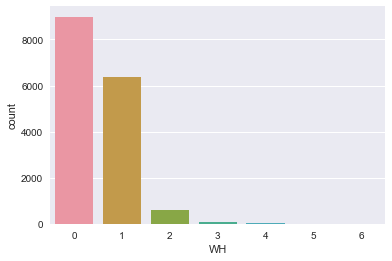

In [58]:
ax = sns.countplot(x="WH", data=data)

#### 2. Number of What questions

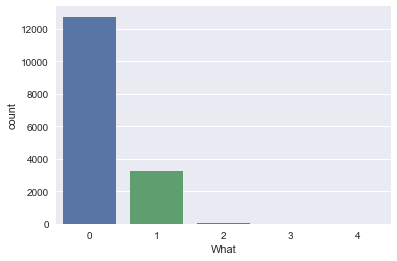

In [59]:
ax = sns.countplot(x="What", data=data)

In [60]:
data.What.sum()

3374

#### 3. Number of When questions

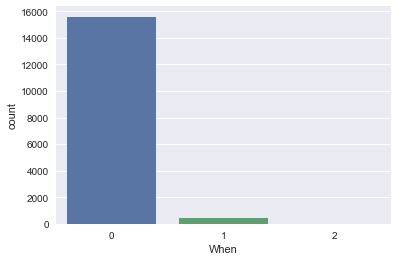

In [61]:
ax = sns.countplot(x="When", data=data)

In [62]:
data.When.sum()

477

#### 4. Number of How questions

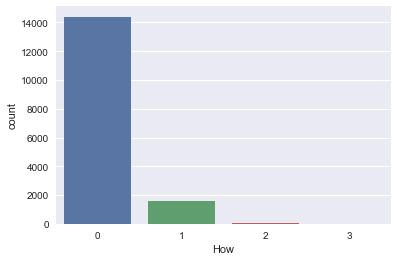

In [63]:
ax = sns.countplot(x="How", data=data)

In [64]:
data.How.sum()

1726

#### 5. Number of Where questions

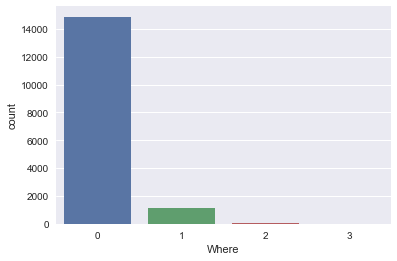

In [65]:
ax = sns.countplot(x="Where", data=data)

In [66]:
data.Where.sum()

1208

#### 6. Number of Why questions

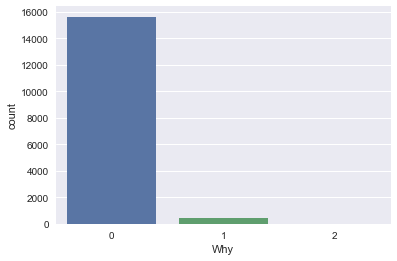

In [67]:
ax = sns.countplot(x="Why", data=data)

In [68]:
data.Why.sum()

441

#### 7. Number of Whos Questions

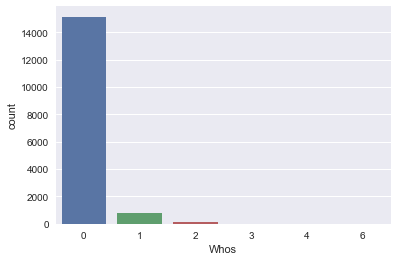

In [69]:
ax = sns.countplot(x="Whos", data=data)

In [70]:
data.Whos.sum()

1087

### V. To confirm: BE questions - Is, Are, Was, Were
We only count the BE verbs at the beggining of the questions.
For example: "Why?" is 1 for WH and 0 for BE, "How did you...?" is 1 for HW and *1* for BE (which is wrong!!!) and "Are you...?" is 0 for WH and 1 for BE. 

In [71]:
data["BE"] = data.words.apply(lambda x: x.count("Is")+x.count("Are")+x.count("Was")+x.count("Were"))

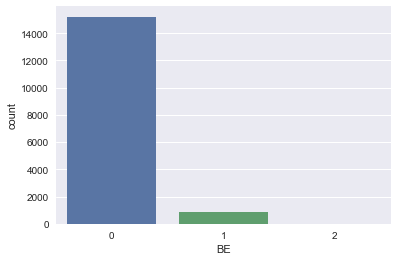

In [72]:
ax = sns.countplot(x="BE", data=data)

In [73]:
data.BE.sum()

844

In [74]:
data

,index,id_new,sent_num,words,word_count,What,When,How,Where,Why,Who,WH,BE,Pro_q,need_check,Whos
0,0,1,5,You know?,2,0,0,0,0,0,0,0,0,0,0,0
1,1,1,5,You know?,2,0,0,0,0,0,0,0,0,0,0,0
2,2,1,5,"So, I want this: Would you tell me where you w...",27,1,0,0,1,0,0,2,0,1,1,0
3,3,1,7,Where did you go?,4,0,0,0,1,0,0,1,0,0,0,0
4,4,1,7,What happened to you?,4,1,0,0,0,0,0,1,0,0,0,0
5,5,1,7,You know?,2,0,0,0,0,0,0,0,0,0,0,0
6,6,1,7,"Tell me, again, where were you and what happen...",17,1,1,0,1,0,0,3,0,0,1,0
7,7,1,9,How old were you then?,5,0,0,1,0,0,0,1,0,0,0,0
8,8,1,9,What grade were you in school?,6,1,0,0,0,0,0,1,0,0,0,0
9,9,1,11,"What means ""first grade""?",4,1,0,0,0,0,0,1,0,0,0,0


In [75]:
# If some questions are both BE and WH questions?
len(data[data.BE>0][data.WH>0])

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


72

### VI. Procedure question - Can, Could, Would, May
For the same reason as V., we only count capital initial ones.

In [76]:
data["Pro_q"] = data.words.apply(lambda x: x.count("Can")+x.count("Could")+x.count("Would")+x.count("May"))

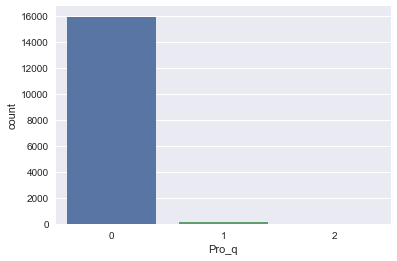

In [77]:
ax = sns.countplot(x="Pro_q", data=data)

In [78]:
data.Pro_q.sum()

122

In [79]:
# add a column to indicate if this row of data needed to be checked
# 0 no, 1 yes
# need check if WH+BE+Pro_q>1
data["need_check"]=(data.WH+data.BE+data.Pro_q).apply(lambda x: 1 if x>1 else 0)

In [80]:
len(data[data.need_check==1])

774

There are 774 values need to be checked.

We also export the data as excel and see if Tableau can do more analysis.

In [81]:
data.to_excel("Boder_questions_spe1.xlsx",index=False)